# Illustrate feature maps.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
from numpy import pi, sin, cos, exp, sqrt

## Make a stick man

In [2]:
man = np.zeros((32, 48))
man[14,12:32] = 1    # body
man[12, 38] = man[16,38] = 1  #Eyes
# Legs
for i in range(10):
    man[14-i, 12-i] = man[14+i, 12-i] = 1
# Feet
man[4,3] = man[24,3] = 1
# Arms
man[8:28,24] = 1
for i in range(4, 8):
    man[i, 32-i] = 1
# Head
c = np.array((14, 38))
r = 6.2
for phi in np.linspace(0, 2*pi, 100):
    p = c + [r * cos(phi), r * sin(phi)]
    p = np.round(p).astype(int)
    man[p[0], p[1]] = 1
    
# man = man[:,::-1]

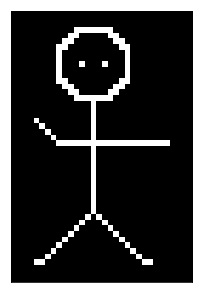

In [3]:
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.imshow(man.T, cmap='gray', origin='lower')
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
fig.savefig('stickman.png', bbox_inches="tight", pad_inches=0)

In [4]:
def convolution(img, feature):
    assert feature.shape == (3,3)
    s = img.shape
    result = np.zeros_like(img)
    for i in range(1, s[0]-1):
        for j in range(1, s[1]-1):
            product = img[i-1:i+2,j-1:j+2] * feature
            result[i,j] = np.sum(product.flat)
    # Apply ReLU
    result = np.maximum(result, 0)
    return result 

In [5]:
def plotit(img, feature, name):
    #fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5))
    fig = plt.figure(figsize=(6,5))
    gs = gridspec.GridSpec(1, 2, width_ratios=[1,2])
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])

    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    ax2.get_xaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax1.imshow(feature.T, cmap='bwr', origin='lower')
    for (j,i), label in np.ndenumerate(feature.T):
        c = ['k', 'w'][int(label < 0)]
        ax1.text(i,j,label,ha='center',va='center', color=c, fontsize=20)
    ax1.set_title(name, loc='left', fontsize=15)
    ax2.imshow(img.T, cmap='gray', origin='lower')
    fig.savefig(name+'.png', bbox_inches="tight", pad_inches=0)

In [6]:
horiz = np.array([[-1, -2, -1],
                  [0, 0, 0],
                  [1, 2, 1]]).T

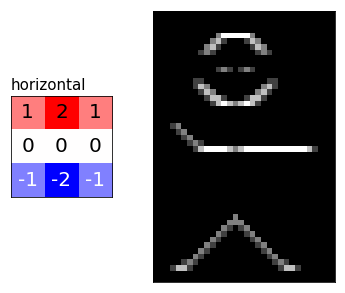

In [7]:
manhoriz = convolution(man, horiz)
#fig, ax = plt.subplots(1,1)
#ax.imshow(manhoriz.T, cmap='gray', origin='lower')
plotit(manhoriz, horiz, 'horizontal')

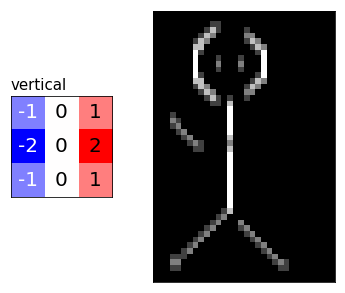

In [8]:
vert = horiz.T
manvert = convolution(man, vert)
plotit(manvert, vert, 'vertical')

In [9]:
slant = np.array([[0, -1, 0],
                  [-1, 0, 1],
                  [0, 1, 0]])

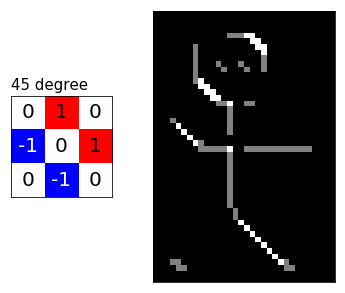

In [13]:
manslant = convolution(man, slant)
plotit(manslant, slant, '45 degree')

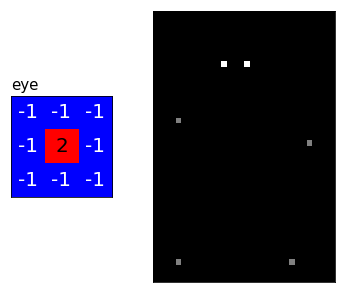

In [11]:
eye = np.array([[-1, -1, -1],
                [-1, 2, -1],
                [-1, -1, -1]])
maneye = convolution(man, eye)
plotit(maneye, eye, 'eye')